In [159]:
#modeules
%store -r data
import pandas as pd
import numpy as np

In [160]:
data

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Year,Rescue_number,Month,Day,Year(1),Identical,Day(R),Month(R),Year(R),Duration
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,2000,0060,12,22,2000,True,22,12,2000,0
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,2001,0187,10,28,2001,True,28,10,2001,0
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,2001,0197,11,1,2001,True,1,11,2001,0
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,2002,0031,3,11,2002,True,11,3,2002,0
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,2002,0118,8,8,2002,True,8,8,2002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,2018,1511,12,18,2018,True,18,12,2018,0
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,2018,1514,12,18,2018,True,18,12,2018,0
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,2018,1532,12,24,2018,True,24,12,2018,0
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,2018,1533,12,24,2018,True,24,12,2018,0


In [161]:
data.isna().sum()

Rescue_ID                0
Date_TimeCaught          0
Researcher               0
CaptureSite              0
ForagingGround           0
CaptureMethod            0
Fisher                   0
LandingSite              0
Species                  0
Tag_1                    0
CCL_cm                   0
CCW_cm                   0
Weight_Kg                0
Sex                      0
TurtleCharacteristics    0
Status                   0
ReleaseSite              0
Date_TimeRelease         0
Year                     0
Rescue_number            0
Month                    0
Day                      0
Year(1)                  0
Identical                0
Day(R)                   0
Month(R)                 0
Year(R)                  0
Duration                 0
dtype: int64

In [162]:
#Check number of turtles rescued per week per capture site
time_data=data[['Date_TimeCaught','CaptureSite','Rescue_ID']]

In [163]:
time_data.set_index('Date_TimeCaught', inplace=True)

In [164]:
time_data

,CaptureSite,Rescue_ID
Date_TimeCaught,,
2000-12-22,CaptureSite_0,2000_RE_0060
2001-10-28,CaptureSite_0,2001_RE_0187
2001-11-01,CaptureSite_0,2001_RE_0197
2002-03-11,CaptureSite_0,2002_RE_0031
2002-08-08,CaptureSite_0,2002_RE_0118
...,...,...
2018-12-18,CaptureSite_9,2018_RE_1511
2018-12-18,CaptureSite_9,2018_RE_1514
2018-12-24,CaptureSite_9,2018_RE_1532


In [165]:
#set to weekly frequency
capture_per_week=time_data.groupby('CaptureSite').resample('W').count()['Rescue_ID']
#result in dataframe
capture_per_week_df=capture_per_week.unstack(level=0)

In [166]:
capture_per_week_df

CaptureSite,CaptureSite_0,CaptureSite_1,CaptureSite_10,CaptureSite_11,CaptureSite_12,CaptureSite_13,CaptureSite_14,CaptureSite_15,CaptureSite_16,CaptureSite_17,...,CaptureSite_26,CaptureSite_27,CaptureSite_28,CaptureSite_3,CaptureSite_4,CaptureSite_5,CaptureSite_6,CaptureSite_7,CaptureSite_8,CaptureSite_9
Date_TimeCaught,,,,,,,,,,,,,,,,,,,,,
1998-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09,0.0,1.0,NaN,NaN,1.0,3.0,NaN,3.0,2.0,0.0,...,NaN,NaN,NaN,1.0,2.0,0.0,NaN,0.0,NaN,6.0
2018-12-16,2.0,5.0,NaN,NaN,1.0,1.0,NaN,6.0,1.0,1.0,...,NaN,NaN,NaN,3.0,2.0,1.0,NaN,0.0,NaN,12.0
2018-12-23,NaN,1.0,NaN,NaN,NaN,1.0,NaN,7.0,0.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,5.0


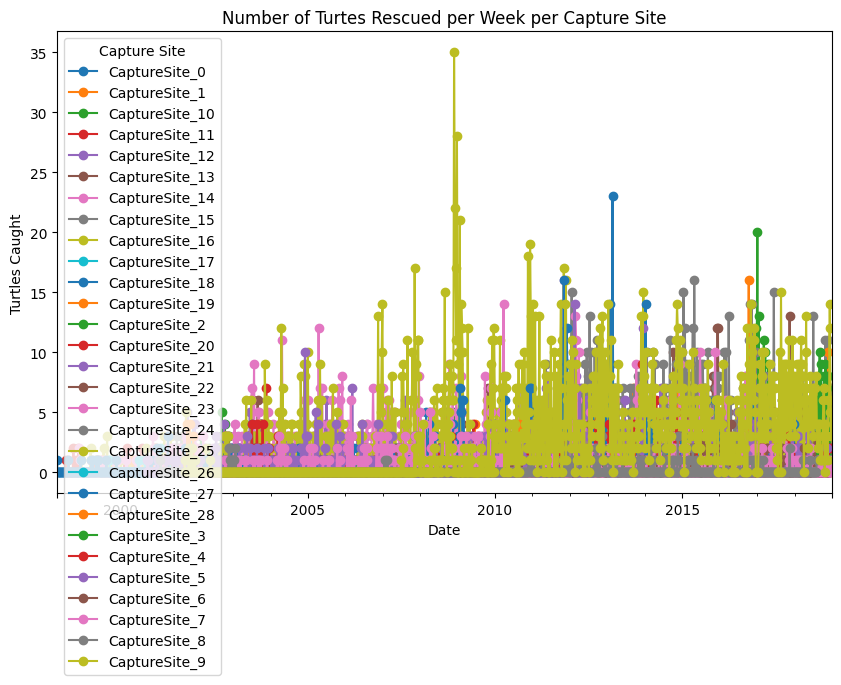

In [167]:
#plot my time series data
import matplotlib.pyplot as plt
ax=capture_per_week_df.plot(marker='o',linestyle='-',figsize=(10,6))
ax.set_title('Number of Turtes Rescued per Week per Capture Site')
ax.set_xlabel('Date')
ax.set_ylabel('Turtles Caught')
ax.legend(title='Capture Site')
plt.show()

In [168]:
#Distriution of number of turtles caught and capture sites
capture_sites=data[['Date_TimeCaught','CaptureSite']]
turtles=data[['Date_TimeCaught','Rescue_ID']]


In [169]:
#group by date
capture_sites=capture_sites.groupby(by='Date_TimeCaught').agg({'CaptureSite':'count'})
turtles=turtles.groupby(by='Date_TimeCaught').agg({'Rescue_ID':'count'})


In [170]:
#Set frequency per week
capture_sites=capture_sites.asfreq(freq='W')
turtles=turtles.asfreq(freq='W')

In [171]:
capture_sites.head()


,CaptureSite
Date_TimeCaught,
1998-04-19,NaN
1998-04-26,NaN
1998-05-03,NaN
1998-05-10,NaN
1998-05-17,NaN


In [172]:
capture_sites['CaptureSite']=capture_sites['CaptureSite'].fillna(value = 0)

In [173]:
turtles.head()

,Rescue_ID
Date_TimeCaught,
1998-04-19,NaN
1998-04-26,NaN
1998-05-03,NaN
1998-05-10,NaN
1998-05-17,NaN


In [174]:
turtles['Rescue_ID']=turtles['Rescue_ID'].fillna(value = 0)

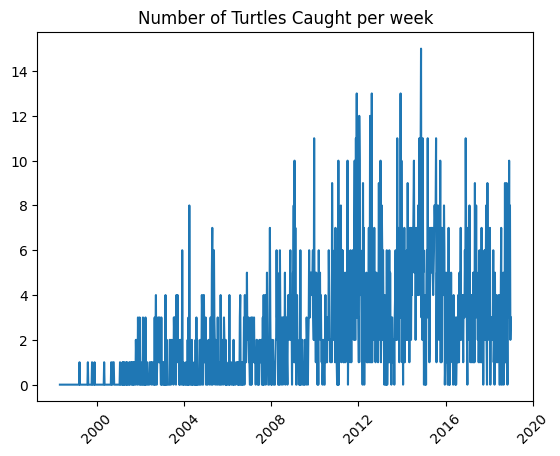

In [175]:
#plot my data
f,ax=plt.subplots(1,1)
ax.plot(turtles['Rescue_ID'])
ax.set_title('Number of Turtles Caught per week')
ax.tick_params(axis='x',rotation=45)
plt.show()

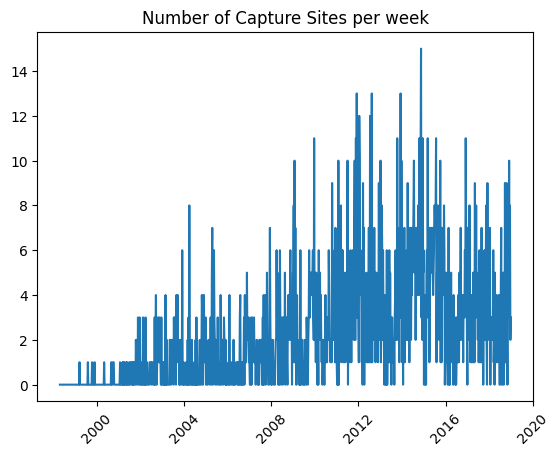

In [176]:
#plot my data
f,ax=plt.subplots(1,1)
ax.plot(capture_sites['CaptureSite'])
ax.set_title('Number of Capture Sites per week')
ax.tick_params(axis='x',rotation=45)
plt.show()

In [177]:
capture_sites['CaptureSite'].isna().sum()

0

In [178]:
turtles['Rescue_ID'].isna().sum()

0

In [179]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(capture_sites['CaptureSite'])
# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary.')

ADF Test p-value: 0.05833889698274364
The data is not stationary.


In [180]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationary(capture_sites,CaptureSite):
    #moving average statistics
    rolmean=capture_sites[CaptureSite].rolling(window=12,center=False).mean()
    rolstd=capture_sites[CaptureSite].rolling(window=12,center=False).std()
    
    #plot
    orig=plt.plot(capture_sites[CaptureSite],color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Mean and Standard deviation')
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.close()
    
    
    #perform Dickey_fuller test
    D_test=adfuller(capture_sites[CaptureSite], autolag='AIC')
    d_output=pd.Series(D_test[0:4],
                       index=['Test_Statistics',
                              'p-value',
                              '#lags used',
                              'Number of Observations used'])
    for key,value in D_test[4].items():
        d_output[key]=value
    print(d_output)
    
              

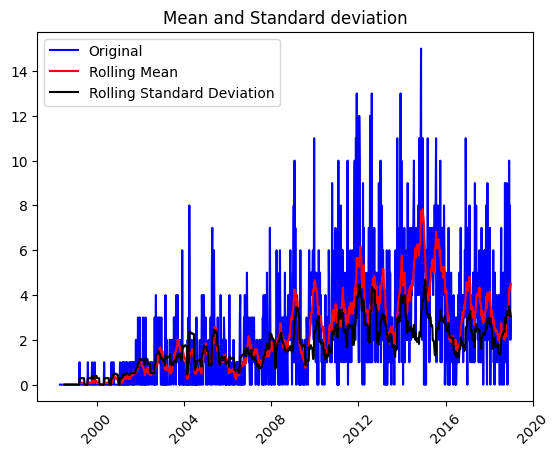

Test_Statistics                  -2.799544
p-value                           0.058339
#lags used                       17.000000
Number of Observations used    1063.000000
1%                               -3.436517
5%                               -2.864263
10%                              -2.568220
dtype: float64


In [181]:
test_stationary(capture_sites=capture_sites,CaptureSite='CaptureSite')

In [196]:
def plot_transformed_data(df, ts, ts_transform):
  """
  Plot transformed and original time series data
  """
  # Plot time series data
  f, ax = plt.subplots(1,1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')

  # Add title
  ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

  # Rotate x-labels
  ax.tick_params(axis = 'x', rotation = 45)

  # Add legend
  ax.legend([ts, ts_transform])
  
  plt.show()
  plt.close()
  
  return

Transformation, Smoothing, and Differencing

C:\Users\hp\AppData\Local\Temp\ipykernel_3292\2006321854.py:2: RuntimeWarning: divide by zero encountered in log
  capture_sites['ts_log'] = capture_sites['CaptureSite'].apply(lambda x: np.log(x))
C:\Users\hp\AppData\Local\Temp\ipykernel_3292\2006321854.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture_sites_example_transform['ts_log_ewma'] = capture_sites_example_transform['ts_log'].ewm(halflife = 7,
C:\Users\hp\AppData\Local\Temp\ipykernel_3292\2006321854.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,CaptureSite,Differenced_Capture_Site,Log_Transformed_Capture_Site,Detrended_Capture_Site,Smoothed_Capture_Site,Residual_Capture_Site,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
Date_TimeCaught,,,,,,,,,,,,,,
2002-11-17,3.0,2.0,1.098612,2.121947,1.857143,0.570486,1.098612,0.470834,1.857143,1.098612,1.142857,0.627778,1.098612,0.000000
2002-11-24,1.0,-2.0,0.000000,0.117558,1.857143,-0.928144,0.000000,0.470834,1.857143,-1.098612,-0.857143,-0.470834,0.522132,-0.522132
2002-12-01,1.0,0.0,0.000000,0.113170,1.857143,-1.429514,0.000000,0.470834,1.857143,0.000000,-0.857143,-0.470834,0.330598,-0.330598
2003-10-05,2.0,1.0,0.693147,0.920091,2.142857,1.125281,0.693147,0.594126,2.142857,0.693147,-0.142857,0.099021,0.435108,0.258040
2006-11-26,2.0,-3.0,0.693147,0.200433,2.285714,-0.751432,0.693147,0.626004,2.285714,-0.916291,-0.285714,0.067143,0.497406,0.195741


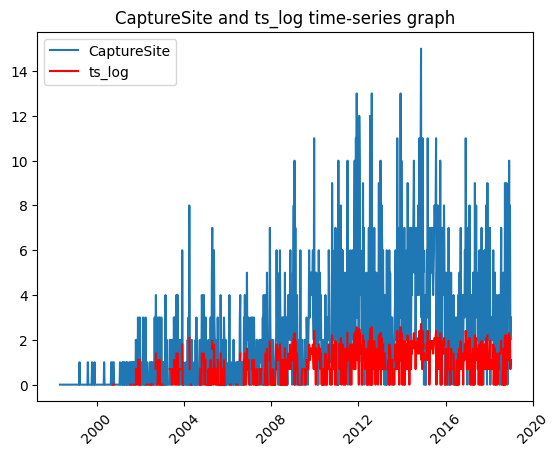

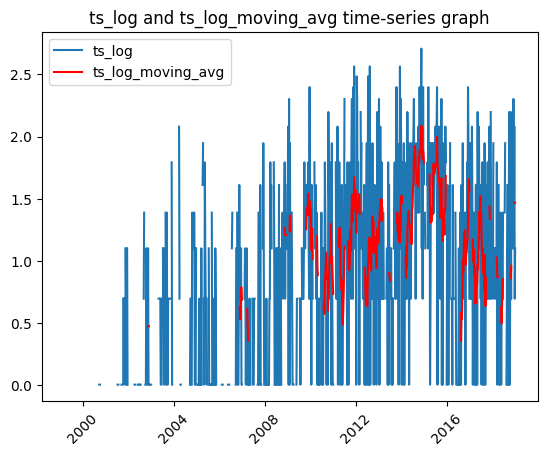

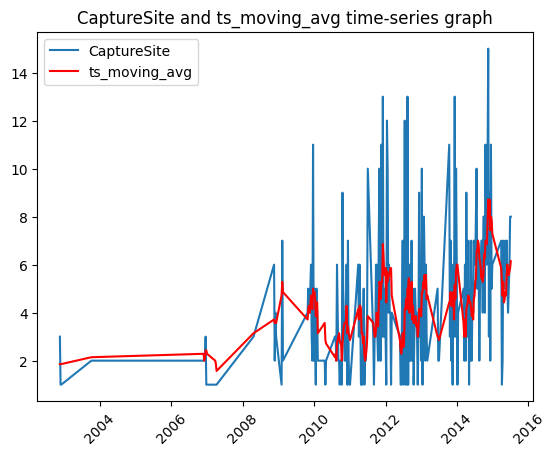

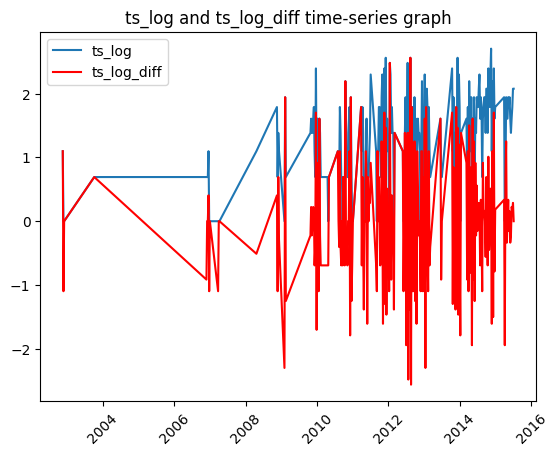

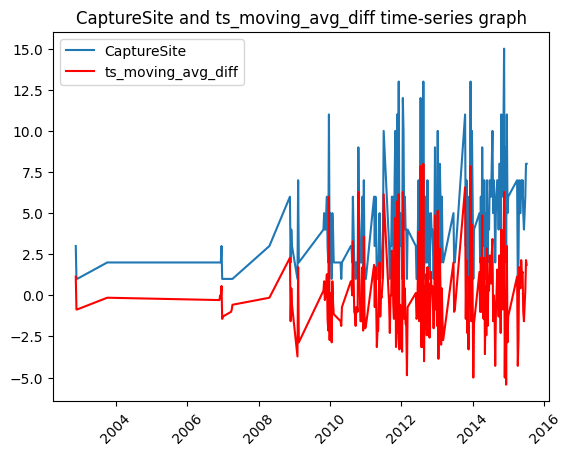

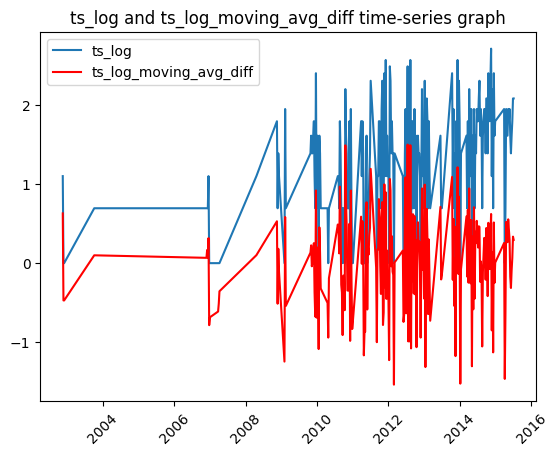

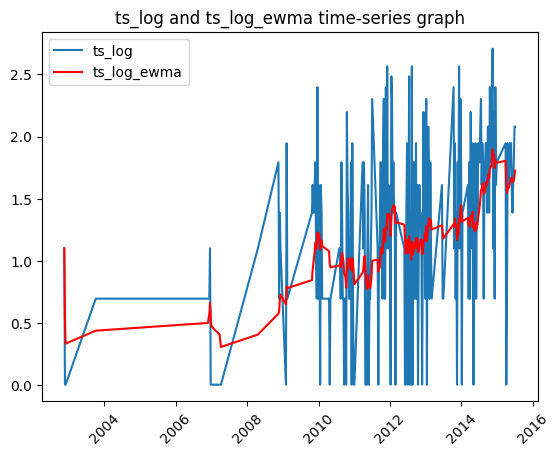

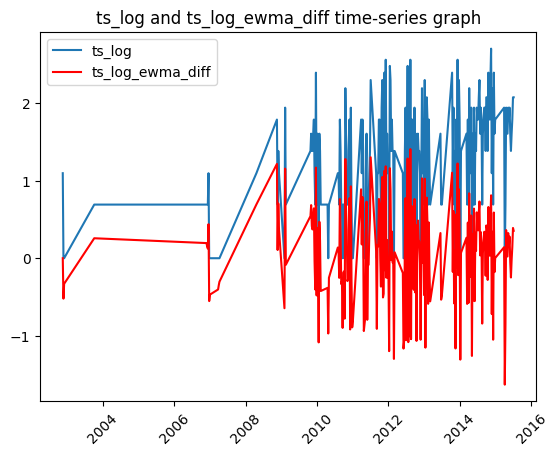

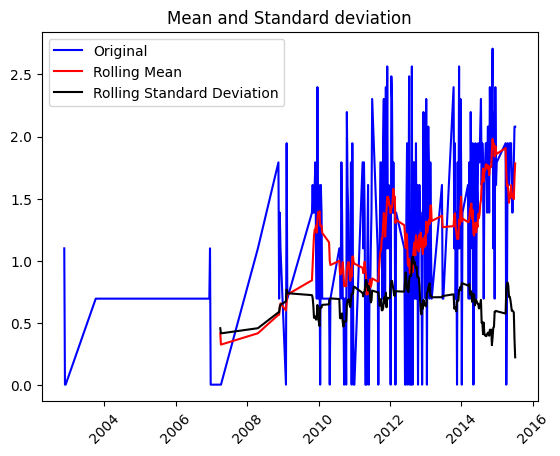

Test_Statistics                 -2.630490
p-value                          0.086858
#lags used                       7.000000
Number of Observations used    214.000000
1%                              -3.461282
5%                              -2.875143
10%                             -2.574020
dtype: float64


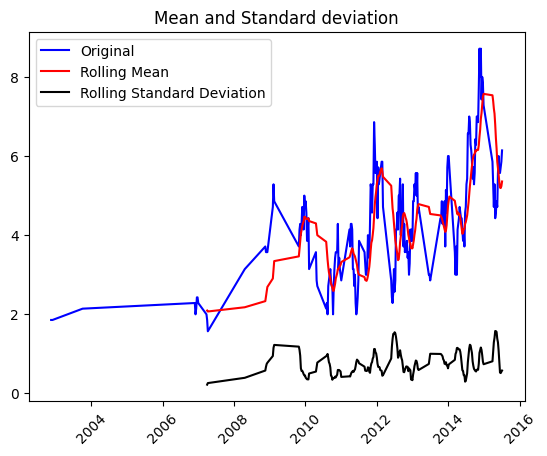

Test_Statistics                 -1.832648
p-value                          0.364378
#lags used                      14.000000
Number of Observations used    207.000000
1%                              -3.462342
5%                              -2.875606
10%                             -2.574267
dtype: float64


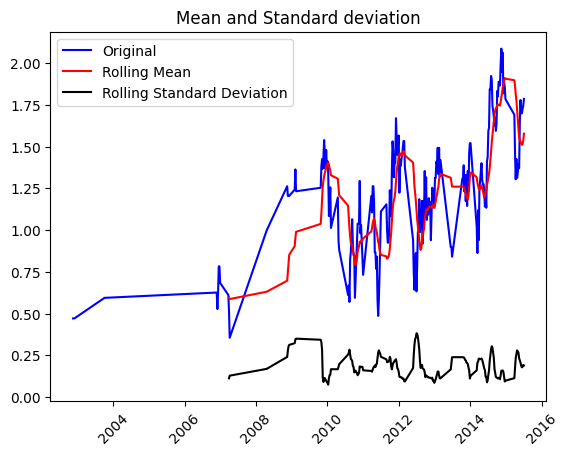

Test_Statistics                 -2.200547
p-value                          0.206047
#lags used                       7.000000
Number of Observations used    214.000000
1%                              -3.461282
5%                              -2.875143
10%                             -2.574020
dtype: float64


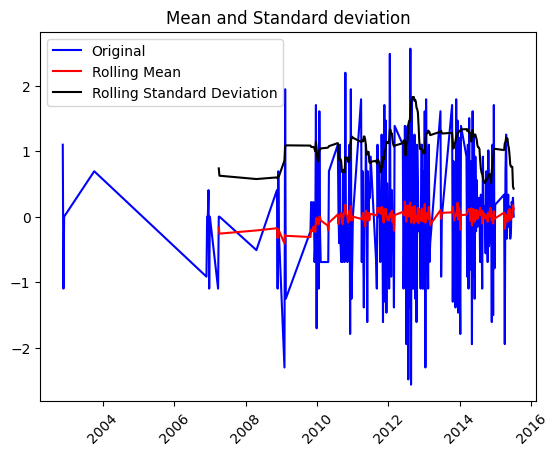

Test_Statistics                 -3.772554
p-value                          0.003201
#lags used                      11.000000
Number of Observations used    210.000000
1%                              -3.461879
5%                              -2.875404
10%                             -2.574159
dtype: float64


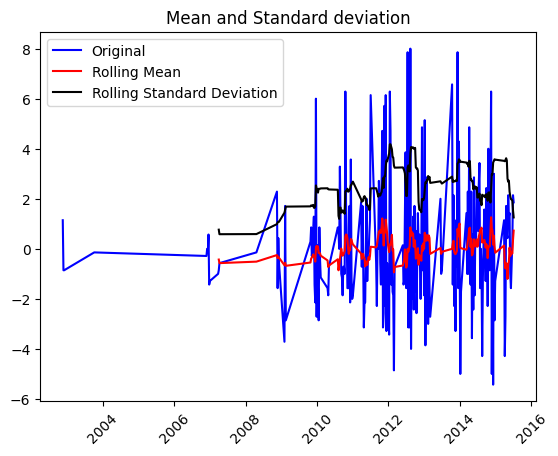

Test_Statistics               -8.971389e+00
p-value                        7.736715e-15
#lags used                     4.000000e+00
Number of Observations used    2.170000e+02
1%                            -3.460849e+00
5%                            -2.874953e+00
10%                           -2.573919e+00
dtype: float64


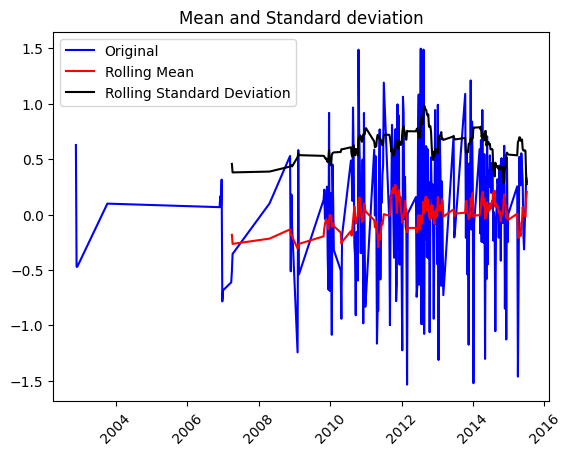

Test_Statistics               -9.118848e+00
p-value                        3.246368e-15
#lags used                     4.000000e+00
Number of Observations used    2.170000e+02
1%                            -3.460849e+00
5%                            -2.874953e+00
10%                           -2.573919e+00
dtype: float64


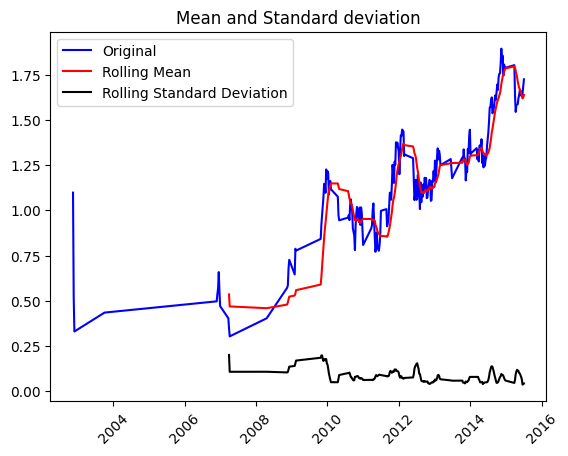

Test_Statistics                 -1.726225
p-value                          0.417654
#lags used                       1.000000
Number of Observations used    220.000000
1%                              -3.460428
5%                              -2.874769
10%                             -2.573821
dtype: float64


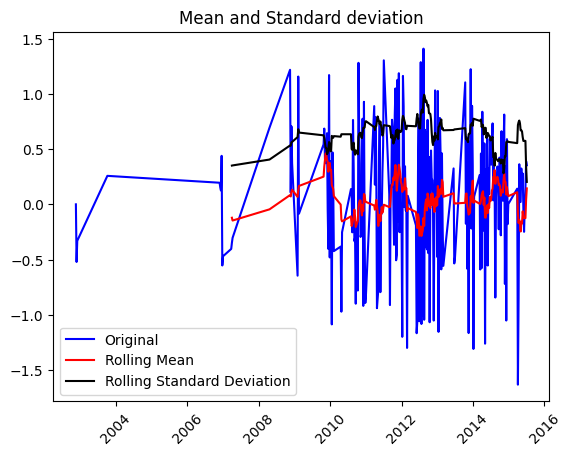

Test_Statistics               -1.743439e+01
p-value                        4.747438e-30
#lags used                     0.000000e+00
Number of Observations used    2.210000e+02
1%                            -3.460291e+00
5%                            -2.874709e+00
10%                           -2.573789e+00
dtype: float64


In [202]:
# Transformation - log ts
capture_sites['ts_log'] = capture_sites['CaptureSite'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
capture_sites['ts_log_moving_avg'] = capture_sites['ts_log'].rolling(window = 7,
                                                               center = False).mean()

# Transformation - 7-day moving average ts
capture_sites['ts_moving_avg'] = capture_sites['CaptureSite'].rolling(window = 7,
                                                       center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
# df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
capture_sites['ts_log_diff'] = capture_sites['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
capture_sites['ts_moving_avg_diff'] = capture_sites['CaptureSite'] - capture_sites['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
capture_sites['ts_log_moving_avg_diff'] = capture_sites['ts_log'] - capture_sites['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
capture_sites_example_transform = capture_sites.dropna()

# Transformation - Logged exponentially weighted moving averages (EWMA) ts
capture_sites_example_transform['ts_log_ewma'] = capture_sites_example_transform['ts_log'].ewm(halflife = 7,
                                                                         ignore_na = False,
                                                                         min_periods = 0,
                                                                         adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
capture_sites_example_transform['ts_log_ewma_diff'] = capture_sites_example_transform['ts_log'] - capture_sites_example_transform['ts_log_ewma']

# Display data
display(capture_sites_example_transform.head())

# Plot data
plot_transformed_data(df = capture_sites, 
                      ts = 'CaptureSite', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = capture_sites, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'CaptureSite', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'CaptureSite', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')

# Plot data
plot_transformed_data(df = capture_sites_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform, 
                  CaptureSite = 'ts_log')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform, 
                  CaptureSite = 'ts_moving_avg')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform, 
                  CaptureSite = 'ts_log_moving_avg')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform,
                  CaptureSite = 'ts_log_diff')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform,
                  CaptureSite = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform,
                  CaptureSite = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform, 
                  CaptureSite = 'ts_log_ewma')

# Perform stationarity test
test_stationary(capture_sites = capture_sites_example_transform,
                  CaptureSite = 'ts_log_ewma_diff')